In [55]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

from contact_graspnet.dataloading import YCBSimulationData
from contact_graspnet.preprocessing import Img2CamCoords, Depth2ImgPoints, ZClipper, UniversalPreprocessor, Resizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


008_gelatin_box


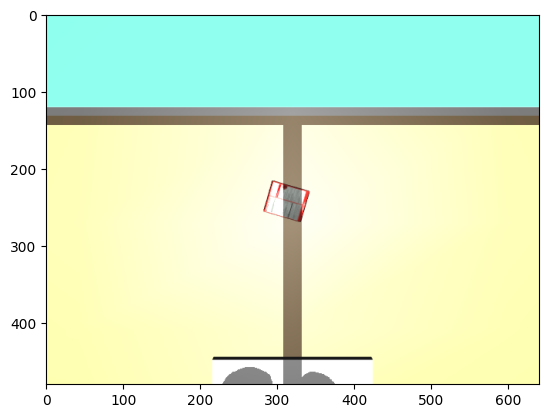

In [56]:
dataset_path = Path.home() / "Documents" / "ycb_sim_data_1"
dataset = YCBSimulationData(dataset_path)

sample = dataset[7]

print(sample.name)

plt.imshow(sample.rgb)

In [57]:
preprocessor = UniversalPreprocessor(
    depth2points_converter = Depth2ImgPoints(),
    img2cam_converter= Img2CamCoords(),
    z_clipper=ZClipper([0.2, 1.8]),
    resizer=None
)

preprocessor_resize = UniversalPreprocessor(
    depth2points_converter = Depth2ImgPoints(),
    img2cam_converter= Img2CamCoords(),
    z_clipper=ZClipper([0.2, 1.8]),
    resizer=Resizer([720, 1280])
)

In [58]:
full_pc, segmented_pc = preprocessor(sample)
full_pc_resize, segmented_pc_resize = preprocessor_resize(sample)


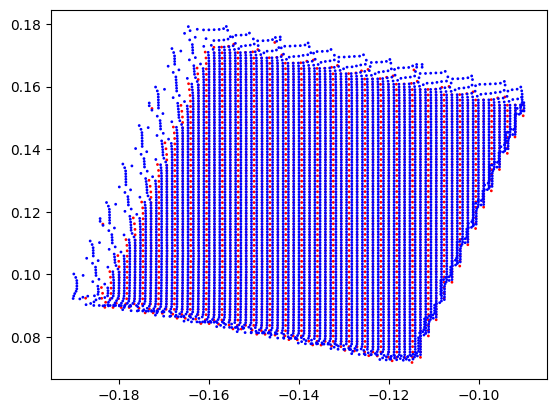

In [59]:
plt.scatter(
    segmented_pc[:, 0],
    segmented_pc[:, 1],
    segmented_pc[:, 2],
    c="r",
    # s=size or max(0.1, pointcloud.shape[0] / 1000),
    # marker=".",
)
plt.scatter(
    segmented_pc_resize[:, 0],
    segmented_pc_resize[:, 1],
    segmented_pc_resize[:, 2],
    c="b",
    # s=size or max(0.1, pointcloud.shape[0] / 1000),
    # marker=".",
)